## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Read the data

In [2]:
data = pd.read_csv("../Data/Combined_Data.csv")
data.head() 

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52683 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
data.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [5]:
data["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

## Prepare the data

In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
data

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [8]:
X = data["statement"]
Y = data["status"]

## Encode the data

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
Y_labeled = label_encoder.fit_transform(Y)
Y_labeled

array([0, 0, 0, ..., 0, 0, 0])

## Clearing the data

In [12]:
from nltk.corpus import stopwords
import nltk # Natural Language Tool Kit
from bs4 import BeautifulSoup
import re

In [13]:
nltk.download("stopwords")
new_list = stopwords.words("english") # Download stopwords in English

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stop_words = set(stopwords.words("english"))

In [15]:
def clean_sentence(sentence):
    if sentence != "":
        sentence = BeautifulSoup(sentence, "lxml").get_text()
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        sentence = sentence.lower()
        words_list = sentence.split()
        words_list_cleaned = [word for word in words_list if word not in stop_words]
        return (" ".join(words_list_cleaned))

### Clear all sentences

In [16]:
X_all = []
passed_sentence_idxs = []

for i in range(len(X)):
    if (i + 1) % 1000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    try:
        X_all.append(clean_sentence(X[i]))
    except:
        print(f"{i}th sentence is passed.")
        passed_sentence_idxs.append(i)
        continue

C:\Users\mehme\AppData\Local\Temp\ipykernel_21708\749091627.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").get_text()


595th sentence is passed.
999 sentence cleaned and loaded.
1539th sentence is passed.
1999 sentence cleaned and loaded.
2448th sentence is passed.
2470th sentence is passed.
2753th sentence is passed.
2999 sentence cleaned and loaded.
3999 sentence cleaned and loaded.
4331th sentence is passed.
4999 sentence cleaned and loaded.
5878th sentence is passed.
5999 sentence cleaned and loaded.
6513th sentence is passed.
6999 sentence cleaned and loaded.
7999 sentence cleaned and loaded.
8999 sentence cleaned and loaded.
9999 sentence cleaned and loaded.
10999 sentence cleaned and loaded.
11999 sentence cleaned and loaded.
12999 sentence cleaned and loaded.
13999 sentence cleaned and loaded.
14999 sentence cleaned and loaded.
15999 sentence cleaned and loaded.
16999 sentence cleaned and loaded.
17999 sentence cleaned and loaded.
18999 sentence cleaned and loaded.
19999 sentence cleaned and loaded.
20999 sentence cleaned and loaded.
21999 sentence cleaned and loaded.
22999 sentence cleaned and

In [17]:
len(X_all)

52683

In [18]:
X_all

['oh gosh',
 'trouble sleeping confused mind restless heart tune',
 'wrong back dear forward doubt stay restless restless place',
 'shifted focus something else still worried',
 'restless restless month boy mean',
 'every break must nervous like something wrong heck',
 'feel scared anxious may family us protected',
 'ever felt nervous know',
 'slept well days like restless huh',
 'really worried want cry',
 'always restless every night even though know wrong strange',
 'confused feeling good lately every time want sleep always feel restless',
 'sometimes needed problem laugh forget problem remember feel restless like well turns still sad burden blah blah blah',
 'worry',
 'sometimes thoughts make anxious afraid close eyes sleep',
 'every time wake definitely nervous excited going try',
 'hope even though worried starts like',
 'restive restless restless',
 'regrets grudges angry things passed worrying much future true serenity',
 'guy sick girl actually feels sick indirectly must feeli

In [19]:
len(passed_sentence_idxs)

360

In [20]:
for idx in passed_sentence_idxs:
    Y.drop(idx, axis=0, inplace=True)
len(Y)

52683

## Encode the data

## Split the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.2)

In [23]:
len(X_train), len(X_test), len(y_train), len(y_test)

(42146, 10537, 42146, 10537)

## Tokenizing the words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer(max_features=2000)

In [26]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

X_train_vectorized = X_train_vectorized.toarray()
X_test_vectorized = X_test_vectorized.toarray()

X_train_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Get and train the models

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
random_forest_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
y_preds_rf = random_forest_classifier.predict(X_test_vectorized)

In [31]:
acc = accuracy_score(y_test, y_preds_rf)
print(f"Random Forest Classifier Model's accuracy is {acc}")

Random Forest Classifier Model's accuracy is 0.5607858024105533


### Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
model = make_pipeline(TfidfVectorizer(max_features=2000), LogisticRegression(solver="lbfgs", max_iter=1000, C=5))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=2000)),
                ('logisticregression', LogisticRegression(C=5, max_iter=1000))])

In [34]:
model.score(X_test, y_test)

0.7524912214102686

In [35]:
logistic_regression_model = LogisticRegression(solver="lbfgs", max_iter=1000)
logistic_regression_model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_preds_log = logistic_regression_model.predict(X_test_vectorized)

In [37]:
acc_log = accuracy_score(y_test, y_preds_log)
print(f"Logistic Regression Model's accuracy is {acc_log}")

Logistic Regression Model's accuracy is 0.7433804688241435


### Naive Bayes

#### Gaussian Naive Bayes (GNB)

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train_vectorized, y_train)

GaussianNB()

In [40]:
y_preds_gnb = gaussianNB.predict(X_test_vectorized)

In [41]:
acc_gnb = accuracy_score(y_test, y_preds_gnb)
print(f"Gaussian Naive Bayes Model's accuracy is {acc_gnb}")

Gaussian Naive Bayes Model's accuracy is 0.5069754199487521


### Bernoulli Naive Bayes (BNB)

In [42]:
from sklearn.naive_bayes import BernoulliNB

In [43]:
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train_vectorized, y_train)

BernoulliNB()

In [44]:
y_preds_bnb = bernoulliNB.predict(X_test_vectorized)

In [45]:
acc_bnb = accuracy_score(y_test, y_preds_bnb)
print(f"Bernoulli Naive Bayes Model's accuracy is {acc_bnb}")

Bernoulli Naive Bayes Model's accuracy is 0.6001708266109899


### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [48]:
y_preds_dtc = decision_tree_classifier.predict(X_test_vectorized)

In [49]:
acc_dtc = accuracy_score(y_test, y_preds_dtc)
print(f"Decision Tree Classifier Model's accuracy is {acc_dtc}")

Decision Tree Classifier Model's accuracy is 0.6470532409604252


### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_vectorized, y_train)

KNeighborsClassifier(n_neighbors=6)

In [52]:
y_preds_knn = knn.predict(X_test_vectorized)

In [53]:
acc_knn = accuracy_score(y_test, y_preds_knn)
print(f"KNN Model's accuracy is {acc_knn}")

KNN Model's accuracy is 0.504887539147765


## Visualize the results

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
cm_log = confusion_matrix(y_test, y_preds_log)
cm_log

array([[ 521,   19,   69,   61,   12,   54,   17],
       [  21,  399,   85,   26,    4,   18,   25],
       [  81,   60, 2130,  185,   29,   59,  576],
       [  21,    4,   55, 3086,    4,   25,   29],
       [   7,    7,   38,   19,  116,    9,    3],
       [  42,   17,   81,   77,    7,  264,   30],
       [  12,   14,  603,  165,   12,   22, 1317]])

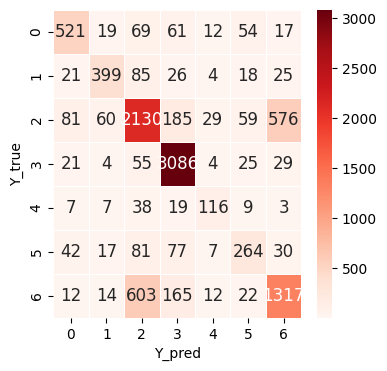

In [56]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_log, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()